# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np

# Carregando os dados
tips = sns.load_dataset('tips')
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_pct'] = tips['tip'] / tips['net_bill']

# Modelo original: tip_pct ~ net_bill
reg_original = smf.ols('tip_pct ~ net_bill', data=tips).fit()
print("Modelo Original: tip_pct ~ net_bill")
print(reg_original.summary())

Modelo Original: tip_pct ~ net_bill
                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           1.52e-06
Time:                        18:47:16   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.


Modelo com log(net_bill):
                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           1.62e-13
Time:                        18:48:48   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept    

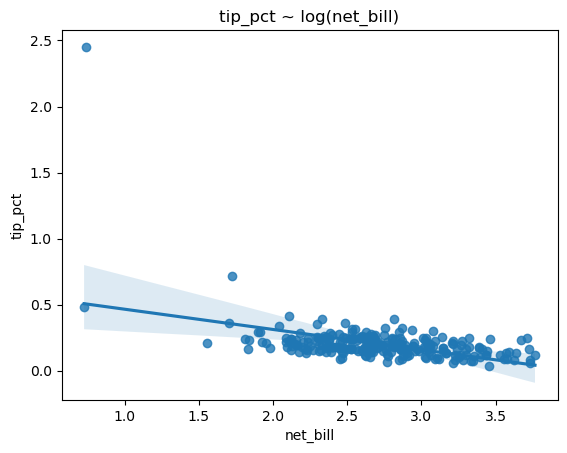

In [3]:
# Modelo com log(net_bill)
reg_logx = smf.ols('tip_pct ~ np.log(net_bill)', data=tips).fit()
print("\nModelo com log(net_bill):")
print(reg_logx.summary())

# Gráfico
sns.regplot(x=np.log(tips['net_bill']), y=tips['tip_pct'])
plt.title('tip_pct ~ log(net_bill)')
plt.show()

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.


Modelo Polinomial (2º grau):
                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           1.06e-09
Time:                        18:52:23   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


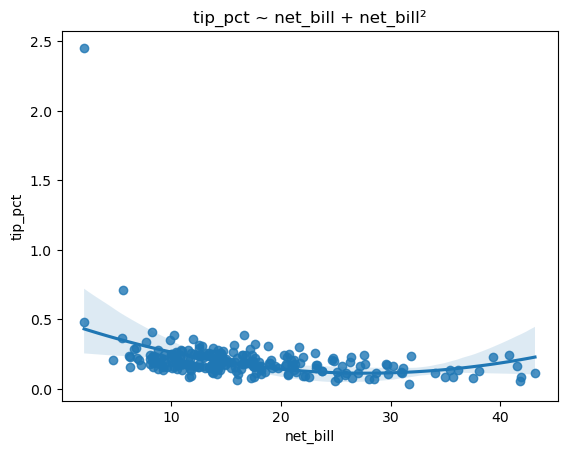

In [11]:
# Modelo polinomial de 2º grau
reg_poly = smf.ols('tip_pct ~ net_bill + np.power(net_bill, 2)', data=tips).fit()
print("\nModelo Polinomial (2º grau):")
print(reg_poly.summary())

# Gráfico
sns.regplot(x='net_bill', y='tip_pct', data=tips, order=2)
plt.title('tip_pct ~ net_bill + net_bill²')
plt.show()

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [13]:
# Modelo com log(tip_pct)
tips['log_tip_pct'] = np.log(tips['tip_pct'])
reg_logy = smf.ols('log_tip_pct ~ net_bill', data=tips).fit()
print("\nModelo com log(tip_pct):")
print(reg_logy.summary())

# Calculando R² em tip_pct (não em log(tip_pct))
tips['pred_logy'] = np.exp(reg_logy.fittedvalues)
r2_logy = np.corrcoef(tips['tip_pct'], tips['pred_logy'])[0,1]**2
print(f"R² em tip_pct: {r2_logy:.4f}")


Modelo com log(tip_pct):
                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           8.27e-16
Time:                        18:53:19   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749     

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [15]:
# Modelo log-log
reg_loglog = smf.ols('log_tip_pct ~ np.log(net_bill)', data=tips).fit()
print("\nModelo log-log:")
print(reg_loglog.summary())

# Calculando R² em tip_pct
tips['pred_loglog'] = np.exp(reg_loglog.fittedvalues)
r2_loglog = np.corrcoef(tips['tip_pct'], tips['pred_loglog'])[0,1]**2
print(f"R² em tip_pct: {r2_loglog:.4f}")


Modelo log-log:
                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           5.20e-20
Time:                        18:53:54   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.

###  6. qual modelo resultou no melhor ajuste?

In [17]:
# Tabela comparativa
comparison = pd.DataFrame({
    'Modelo': ['Original', 'log(X)', 'Polinomial', 'log(Y)', 'log-log'],
    'R² (tip_pct)': [
        reg_original.rsquared,
        reg_logx.rsquared,
        reg_poly.rsquared,
        r2_logy,
        r2_loglog
    ],
    'AIC': [
        reg_original.aic,
        reg_logx.aic,
        reg_poly.aic,
        reg_logy.aic,
        reg_loglog.aic
    ]
})

print("\nComparação dos Modelos:")
print(comparison.sort_values('R² (tip_pct)', ascending=False))


Comparação dos Modelos:
       Modelo  R² (tip_pct)         AIC
4     log-log      0.308949  196.713335
1      log(X)      0.201729 -243.619019
2  Polinomial      0.157608 -228.492476
3      log(Y)      0.114410  216.005183
0    Original      0.091291 -212.002295
